In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [2]:
df=pd.read_csv('scores_data.csv')

In [3]:
df.head() # display the frist 5 rows

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [4]:
df.shape #shape of File

(149, 3)

### Data Understanding & Preparation

* The dataset contains 149 learners across 3 batches.
* Scores are originally stored as strings in the format “x / 7”.
* For analysis, only the numerator (actual score) is extracted and converted to numeric.

### Clean column names

In [5]:
df.columns = df.columns.str.strip()

In [11]:
df.columns

Index(['Batch', 'User_ID', 'Score', 'Score_num'], dtype='object')

### Extract numeric score

In [6]:
df['Score_num'] = df['Score'].str.split('/').str[0].astype(int)

In [7]:
df['Score_num']

0      6
1      6
2      7
3      7
4      4
      ..
144    4
145    4
146    4
147    3
148    2
Name: Score_num, Length: 149, dtype: int64

### Descriptive statistics

In [8]:
print(df.groupby('Batch')['Score_num'].describe())

            count      mean       std  min  25%  50%   75%  max
Batch                                                          
AI_ELITE_4   48.0  3.791667  1.443376  0.0  3.0  4.0  4.25  7.0
AI_ELITE_6   48.0  4.229167  1.640441  0.0  3.0  4.0  5.00  7.0
AI_ELITE_7   53.0  5.056604  1.446682  2.0  4.0  5.0  6.00  7.0


### Visulization

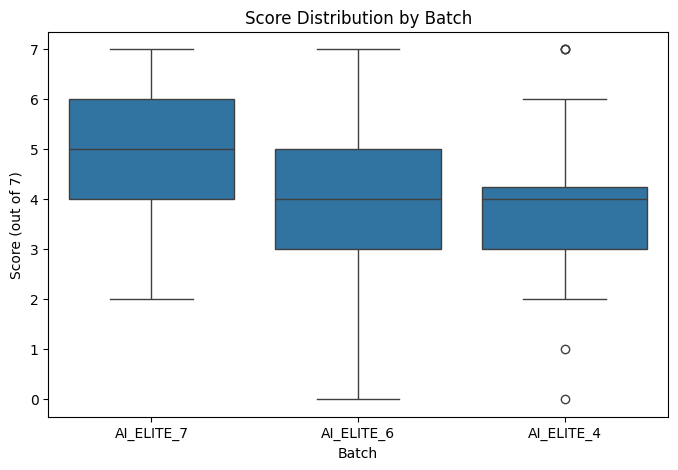

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Batch', y='Score_num')
plt.title("Score Distribution by Batch")
plt.ylabel("Score (out of 7)")
plt.show()

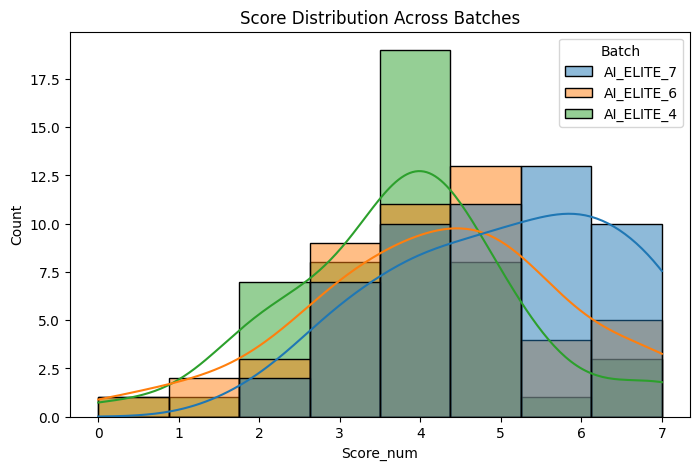

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Score_num', hue='Batch', kde=True, bins=8)
plt.title("Score Distribution Across Batches")
plt.show()

### Overall Conclusion
* AI_ELITE_7 demonstrates high performance, better consistency, and fewer low scorers.
* AI_ELITE_6 shows large variation, indicating the need for targeted support for weaker students.
* AI_ELITE_4 has more low-end scores and outliers, suggesting gaps in understanding or engagement.